In [12]:
setwd('../../')
source('.Rprofile')
setwd('./benchmark/analysis')

library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)
library(patchwork)

In [13]:
data <- read_csv('../multi/build_3d.csv')
data$cells <- as.numeric(data$cells)
data <- data[data$global_score > 0,]
data <- data[data$cells == 0,] %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'PCA')) %>% 
        mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
data %>% tail(5)

Rows: 504 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (8): cells, seed, celltype_score, edge_score, euclidean_dis, global_scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
brain_3_cd,0,7,Harmony,0.6097348,-43.31565,0.19281564,0.6097348,0.6097348,8.003976
brain_3_cd,0,7,PASTE,0.8292043,-22.48732,0.05273439,0.8292043,0.8292043,54.673107
brain_3_cd,0,7,SLAT,0.7825707,-34.62839,0.05969232,0.7825707,0.7825707,6.943130
brain_3_cd,0,7,STAGATE,0.7825707,-48.37832,0.06965976,0.7825707,0.7825707,25.078714
brain_3_cd,0,7,Seurat,0.6283882,-45.94171,0.18612919,0.6283882,0.6283882,115.902000


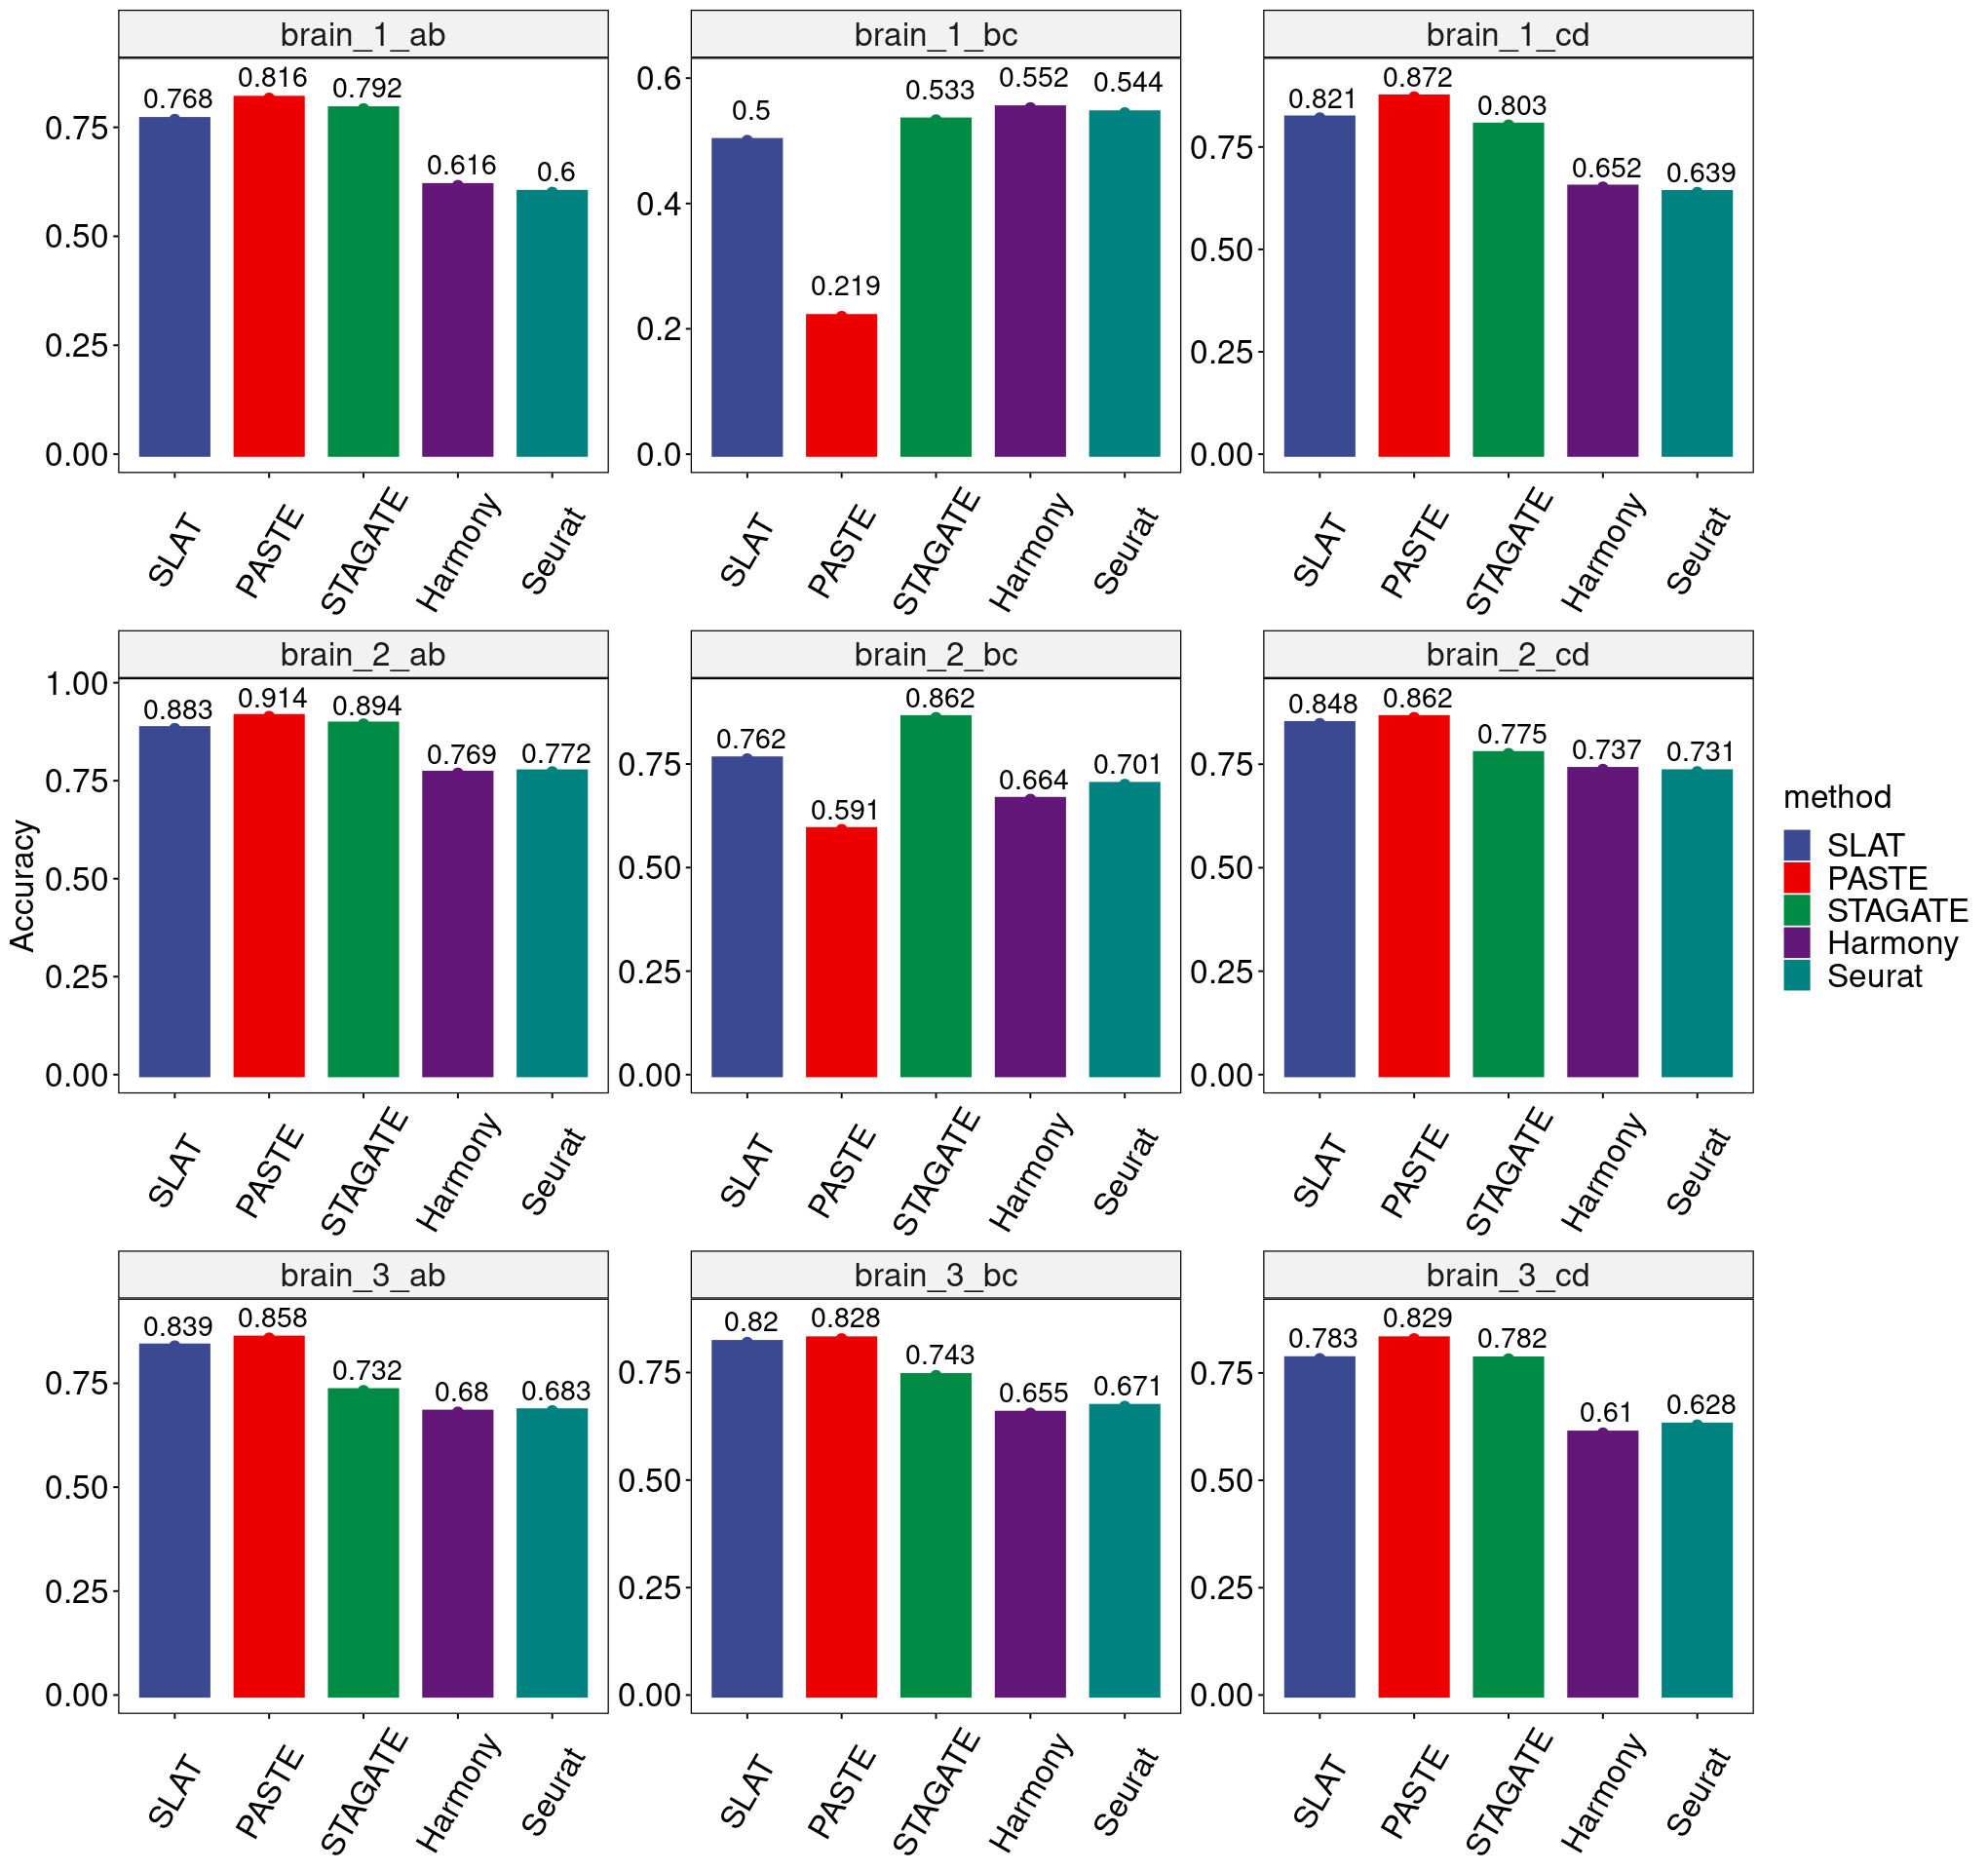

In [20]:
options(repr.plot.width=17, repr.plot.height=16)
ggbarplot(data, x="method", y="global_score", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='Accuracy', size=1.5, lab.size=5, facet.by='dataset',label = F, label.pos = "out") %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.05, label = paste("", round(mean(x), 3))), geom="text",size=6) +
facet_wrap(~dataset, scales="free")+
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))


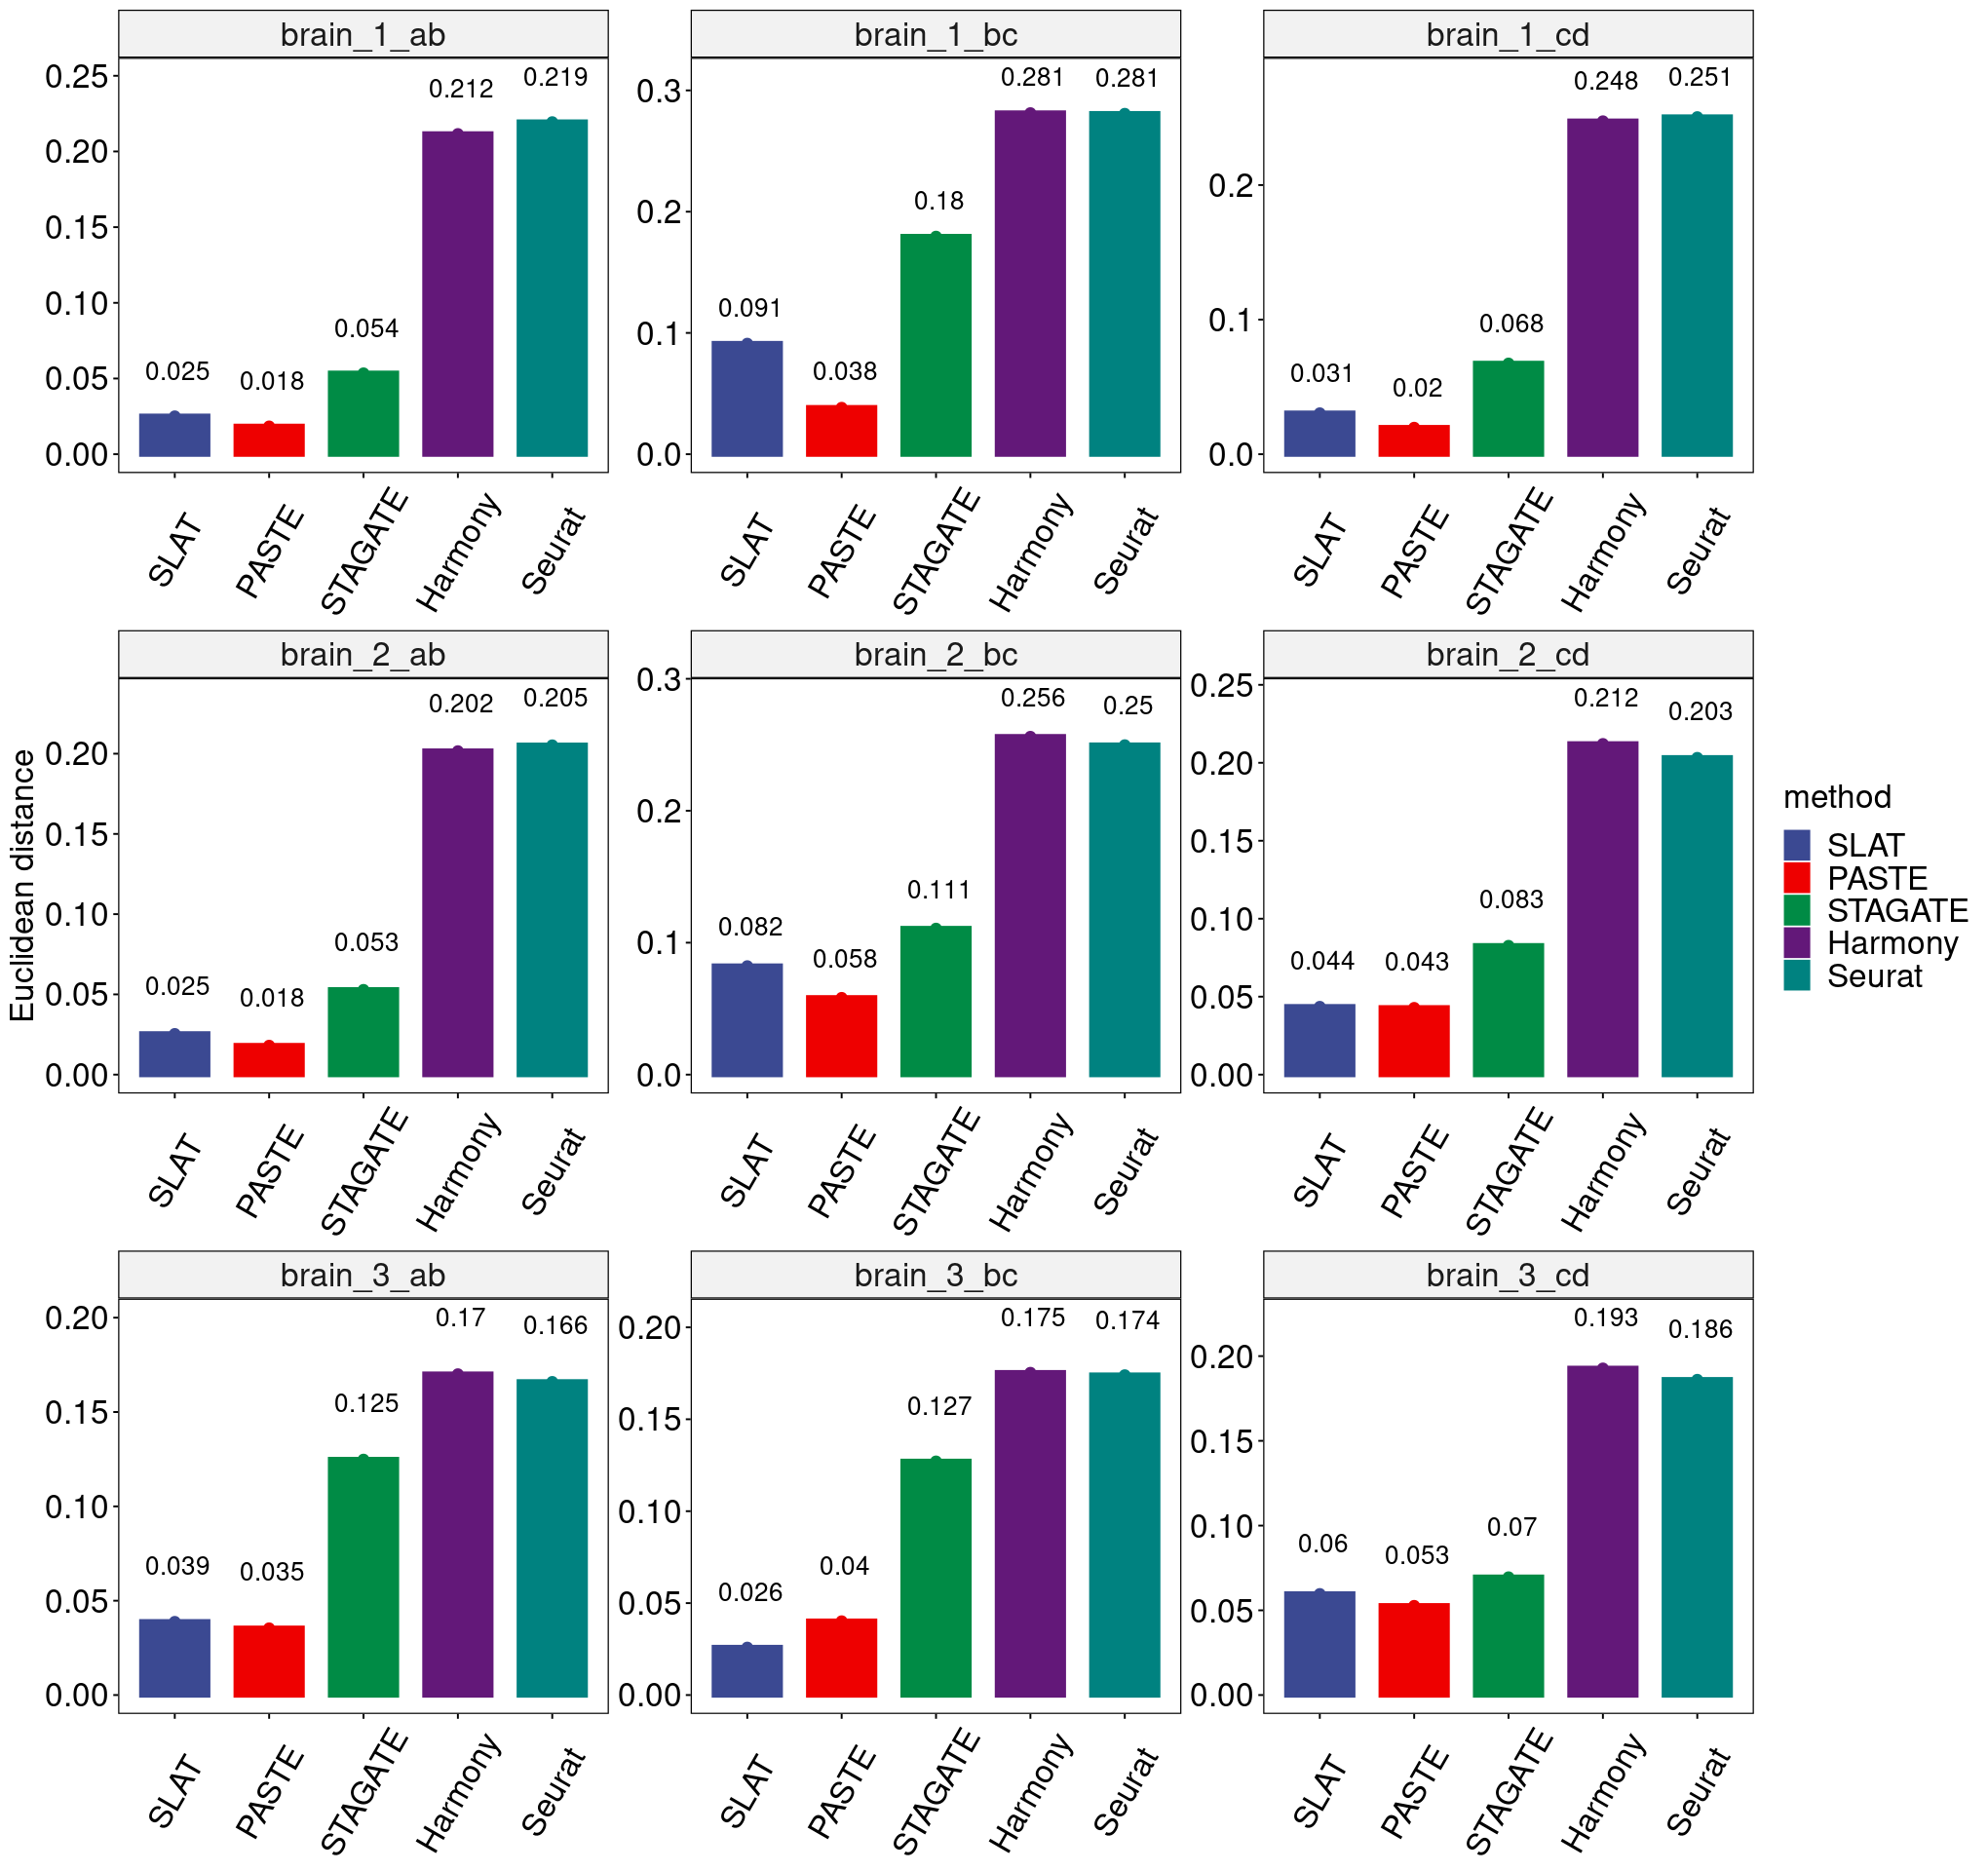

In [19]:
options(repr.plot.width=17, repr.plot.height=16)
ggbarplot(data, x="method", y="euclidean_dis", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='Euclidean distance', size=1.5, lab.size=5, facet.by='dataset',label = F, label.pos = "out") %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.03, label = paste("", round(mean(x), 3))), geom="text",size=5.5) +
facet_wrap(~dataset, scales="free")+
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))
